In [34]:
import os
import sys

sys.path.append('../')
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import h5py
import hdf5storage

from kwave.ktransducer import kWaveGrid

In [35]:
Nx, Ny = 560, 560
dx, dy = 4.e-5, 4.e-5                       # Grid point spacing in the y direction [m].

center_pos = [0, 0]
kgrid = kWaveGrid([Nx, Ny], [dx, dy])

(19.5, 35.5)

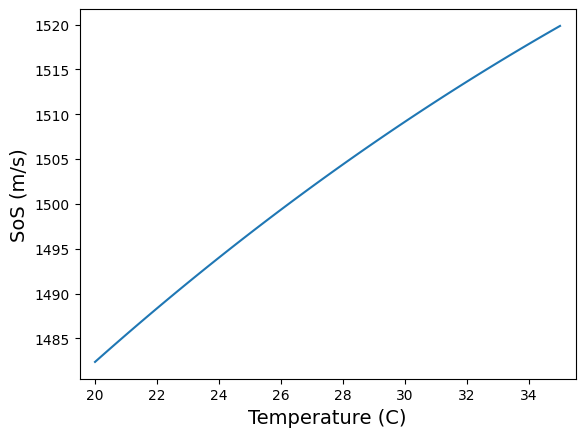

In [36]:
def get_water_SoS(t):
    """Calculate the speed of sound of water at temperature `t` in Celsius."""
    a = [1.402385e3, 5.038813, -5.799136e-2, 3.287156e-4, -1.398845e-6, 2.787860e-9]
    SoS = 0
    for i in range(len(a)):
        SoS += a[i] * t**i
    return SoS

ts = np.linspace(20, 35, 100)
vs = [get_water_SoS(t) for t in ts]
plt.plot(ts, vs)
plt.xlabel('Temperature (C)', fontsize=14)
plt.ylabel('SoS (m/s)', fontsize=14)
plt.xlim(19.5, 35.5)

In [37]:
T = 31.0
v0 = get_water_SoS(T)   # SoS of the two circles. [m/s]

structures = {
  'body': (9.8e-3, 1545, (0, 0)),
  'liver': (7.5e-3, 1585.7, (0, 1.7e-3)),
  'vertebral column': (1.4e-3, 3014.9, (0, -7.7e-3)),
  'spinal cord': (1e-3, 1542.0, (0, -7.7e-3)),
  'abdominal aorta': (0.8e-3, 1578.2, (0, -5.1e-3)), 
  'stomach lumen': (2.5e-3, 1535.4, (3e-3, -0.5e-3)),
  'intestine lumen': (1.4e-3, 1535.4, (-4e-3, 3e-3)),
}

XX, YY = np.meshgrid(kgrid.x_vec.copy(), kgrid.y_vec.copy())
SoS = np.ones((Ny, Nx)) * v0
for key, (R, v, offset) in structures.items():
    SoS[(XX - offset[0])**2 + (YY - offset[1])**2 < R**2] = v

<Figure size 700x700 with 0 Axes>

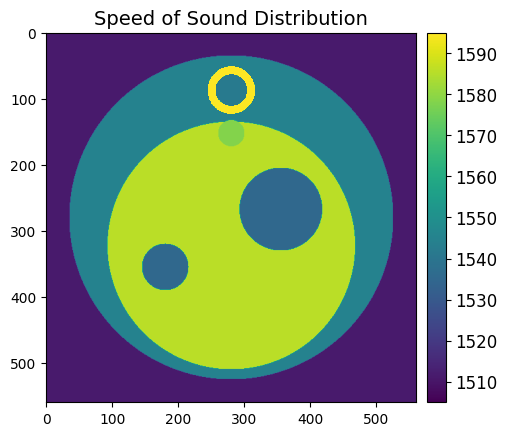

In [38]:
plt.figure(figsize=(7,7))
norm = matplotlib.colors.Normalize(vmax=1595, vmin=1505)
fig, ax = plt.subplots()
plt.title('Speed of Sound Distribution', fontsize=14)
plt.imshow(SoS, norm=norm)
cax = fig.add_axes([ax.get_position().x1+0.017, ax.get_position().y0, 0.03, ax.get_position().height])
cb = plt.colorbar(cax=cax, norm=norm)
cb.ax.tick_params(labelsize=13)
# cb.ax.set_yticks([1500, 1520, 1540, 1560, 1580, 1600])
plt.tick_params(labelsize=12)
plt.show()
# plt.savefig('../figures/SoS.jpg', bbox_inches='tight')

### Save the SoS

In [39]:
file_name = os.path.join('../', 'data', 'SoS.mat')
data = {'SoS': SoS.swapaxes(0,1)}
hdf5storage.savemat(file_name, data)